# Time Series and Time-Dependent Analysis in python

In [50]:
import pandas as pd
import datetime
#import pandas_datareader.data as web
from pandas import Series, DataFrame
import numpy as np

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import style

In [138]:
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/AirPassengers.csv', 
                 parse_dates=['date'], index_col='date')


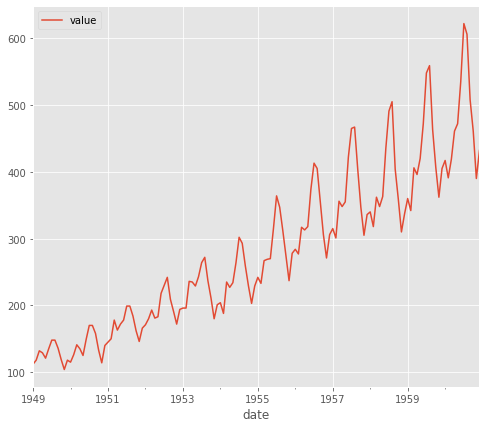

In [38]:
# Adjusting the style of matplotlib
style.use('ggplot')

df.plot(label='Passangers')
plt.legend()

In [39]:
### Auto-correlation test (Ljung-Box white-noise test)
import statsmodels.api as sm

In [40]:
## decomposition
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(df, model='additive', extrapolate_trend='freq')

In [41]:
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

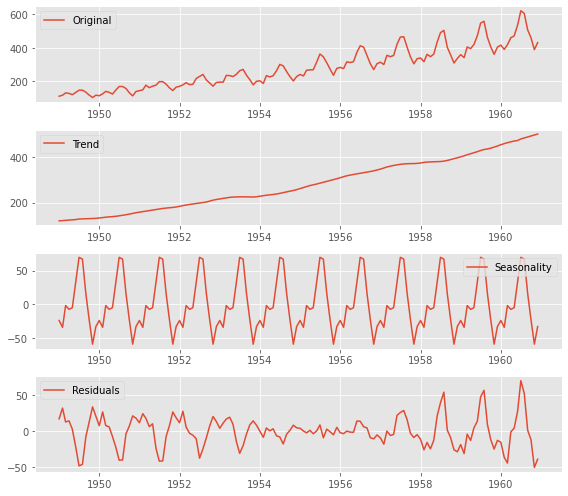

In [44]:
plt.subplot(411)
plt.plot(df, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

In [54]:
#ACF and PACF plots:
#from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

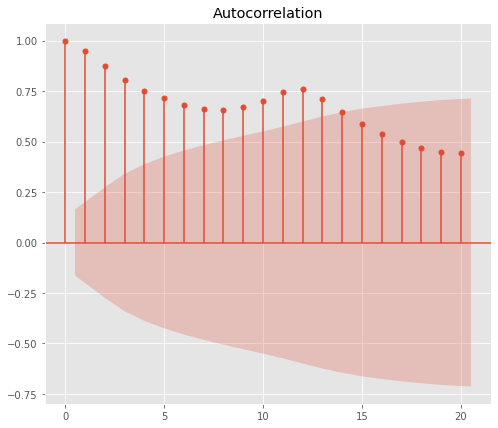

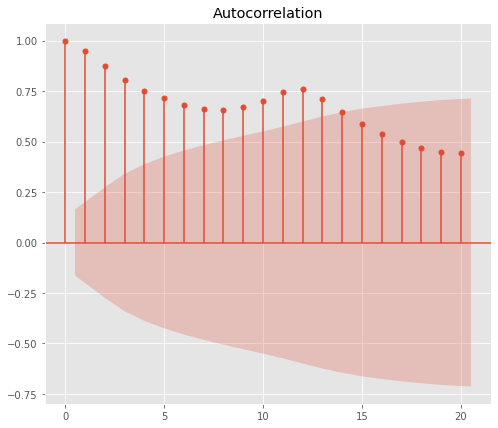

In [60]:
plot_acf(df, lags=20)

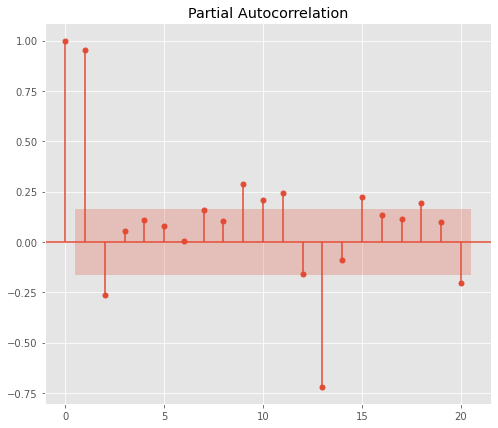

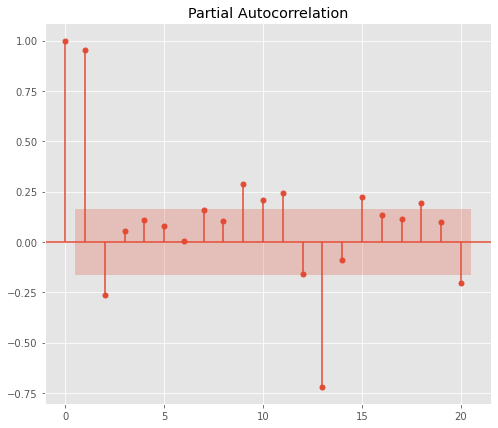

In [59]:
plot_pacf(df, lags=20)

In [61]:
### ARIMA 
from statsmodels.tsa.arima_model import ARIMA

In [62]:
model = ARIMA(df, order=(3, 0, 0))  
results_AR = model.fit(disp=-1)  

C:\Users\Thomas\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


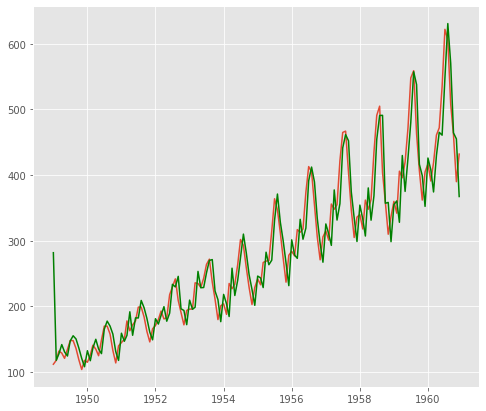

In [68]:
plt.plot(df)
plt.plot(results_AR.fittedvalues, color='green')


### AUTO-ARIMA

In [109]:
### AUTO-ARIMA
##!pip install --user pmdarima
import pmdarima as pmd

In [110]:
def arimamodel(timeseriesarray):
    autoarima_model = pmd.auto_arima(timeseriesarray, 
                              start_p=1, 
                              start_q=1,
                              test="adf",
                              trace=True)
    return autoarima_model

In [111]:
arima_model = arimamodel(df)
arima_model.summary()

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1409.748, Time=0.15 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1790.368, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1428.179, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.05 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2057.847, Time=0.01 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=1408.249, Time=0.14 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=1413.639, Time=0.08 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=1408.287, Time=0.18 sec
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=1408.344, Time=0.24 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=1411.050, Time=0.11 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=1410.342, Time=0.13 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.30 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=1410.569, Time=0.08 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0] intercept
Total fit time: 1.533 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  144
Model:               SARIMAX(2, 0, 1)   Log Likelihood                -699.125
Date:                Tue, 25 May 2021   AIC                           1408.249
Time:                        12:26:50   BIC                           1423.098
Sample:                             0   HQIC                          1414.283
                                - 144                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     19.6007     12.051      1.627      0.104      -4.018      43.219
ar.L1          0.4990      0.131      3.822      0.000       0.243       0.755
ar.L2          0.4314      0.124      3.466      0.001       0.187       0.675
ma.L1          0.8565      0.081     10.540      0.000       0.697       1.016
sigma2       942.2492    107.314      8.780      0.000     731.917    1152.582
===================================================================================
Ljung-Box (Q):                      288.95   Jarque-Bera (JB):                 0.89
Prob(Q):                              0.00   Prob(JB):                         0.64
Heteroskedasticity (H):               6.30   Skew:                             0.16
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.22
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [115]:
results_AR = arima_model.fit(disp=-1, y=df['value'])  

In [166]:
df_arima = pd.DataFrame(results_AR.predict_in_sample(),index = df.index,columns=['Prediction'])

In [167]:
df_arima

,Prediction
date,
1949-01-01,281.730377
1949-02-01,117.998852
1949-03-01,126.803566
1949-04-01,140.339698
1949-05-01,131.931477
...,...
1960-08-01,617.984582
1960-09-01,580.077421
1960-10-01,472.801166


In [168]:
forecast = arima_model.predict(n_periods=24)

In [169]:
forecast

array([470.01092402, 440.51393707, 442.19190357, 430.30431904,
       425.09593451, 417.36851732, 411.26542154, 404.88620462,
       399.069924  , 393.41544714, 388.0845647 , 382.98496723,
       378.14038576, 373.52284067, 369.12860681, 364.94375488,
       360.95972673, 357.1662425 , 353.55448029, 350.11560298,
       346.84139485, 343.7239437 , 340.75575685, 337.92968194])

In [149]:
df.index.max()

Timestamp('1960-12-01 00:00:00')

In [182]:
fdates=['1961-01-01 00:00:00','1961-02-01 00:00:00','1961-03-01 00:00:00','1961-04-01 00:00:00','1961-05-01 00:00:00','1961-06-01 00:00:00',
       '1961-07-01 00:00:00','1961-08-01 00:00:00','1961-09-01 00:00:00','1961-10-01 00:00:00','1961-11-01 00:00:00','1961-12-01 00:00:00',
       '1962-01-01 00:00:00','1962-02-01 00:00:00','1962-03-01 00:00:00','1962-04-01 00:00:00','1962-05-01 00:00:00','1962-06-01 00:00:00',
       '1962-07-01 00:00:00','1962-08-01 00:00:00','1962-09-01 00:00:00','1962-10-01 00:00:00','1962-11-01 00:00:00','1962-12-01 00:00:00']

In [183]:
df_forecast = pd.DataFrame(forecast ,index=fdates,columns=['Prediction'])
df_forecast

,Prediction
1961-01-01 00:00:00,470.010924
1961-02-01 00:00:00,440.513937
1961-03-01 00:00:00,442.191904
1961-04-01 00:00:00,430.304319
1961-05-01 00:00:00,425.095935
1961-06-01 00:00:00,417.368517
1961-07-01 00:00:00,411.265422
1961-08-01 00:00:00,404.886205
1961-09-01 00:00:00,399.069924
1961-10-01 00:00:00,393.415447


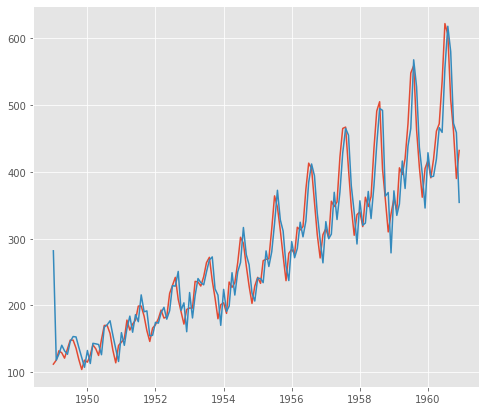

In [172]:
plt.plot(df)
plt.plot(df_arima)

In [185]:
pd.concat([df_arima,df_forecast],axis=0)

,Prediction
1949-01-01 00:00:00,281.730377
1949-02-01 00:00:00,117.998852
1949-03-01 00:00:00,126.803566
1949-04-01 00:00:00,140.339698
1949-05-01 00:00:00,131.931477
...,...
1962-08-01 00:00:00,350.115603
1962-09-01 00:00:00,346.841395
1962-10-01 00:00:00,343.723944
1962-11-01 00:00:00,340.755757


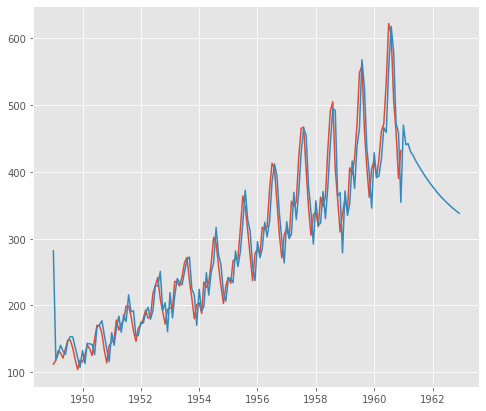

In [187]:
plt.plot(df)
plt.plot(pd.concat([df_arima,df_forecast],axis=0))

# Survival Analysis

In [199]:
### if not installed, install lifelines
# !pip install lifelines

In [273]:
from lifelines import KaplanMeierFitter, CoxPHFitter
from scipy import stats

In [196]:
time = [3,4,2,4,3,1,5,6,4]
status = [1,1,0,1,0,1,1,0,1]

df = pd.DataFrame({'time':time, 'status':status})
df

,time,status
0,3,1
1,4,1
2,2,0
3,4,1
4,3,0
5,1,1
6,5,1
7,6,0
8,4,1


### Survival function

In [202]:
kmf = KaplanMeierFitter() 

<lifelines.KaplanMeierFitter>


In [207]:
## Fit the data into the model
kmf.fit(time, status, label='Kaplan Meier Estimate')
kmf.survival_function_

,Kaplan Meier Estimate
timeline,
0.0,1.000000
1.0,0.888889
2.0,0.888889
3.0,0.761905
4.0,0.304762
5.0,0.152381
6.0,0.152381


<AxesSubplot:xlabel='timeline'>

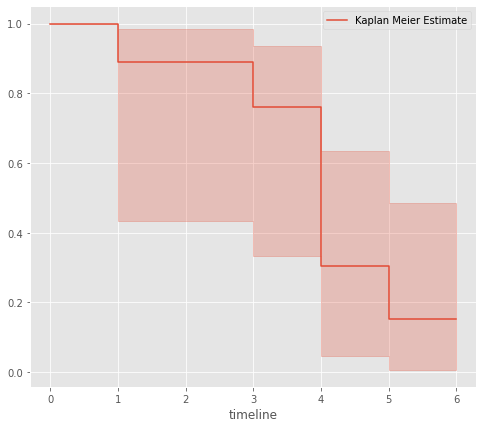

In [209]:
## Create an estimate
kmf.plot(ci_show=True)

### Lung cancer survival

In [210]:
df = pd.read_csv("C:/Users/Thomas/Documents/BIDS/data/ncctg_lung_cancer.csv")
df.head()

,inst,time,status,age,sex,ph.ecog,ph.karno,pat.karno,meal.cal,wt.loss
0,3.0,306,2,74,1,1.0,90.0,100.0,1175.0,NaN
1,3.0,455,2,68,1,0.0,90.0,90.0,1225.0,15.0
2,3.0,1010,1,56,1,0.0,90.0,90.0,NaN,15.0
3,5.0,210,2,57,1,1.0,90.0,60.0,1150.0,11.0
4,1.0,883,2,60,1,0.0,100.0,90.0,NaN,0.0


In [214]:
df['sex'] = df['sex'].astype('category')

In [215]:
kmf = KaplanMeierFitter()
kmf.fit(df.time, df.status, label='Kaplan Meier Estimate')
kmf.survival_function_

,Kaplan Meier Estimate
timeline,
0.0,1.000000
5.0,0.995614
11.0,0.982456
12.0,0.978070
13.0,0.969298
...,...
840.0,0.017544
883.0,0.013158
965.0,0.008772


<AxesSubplot:xlabel='timeline'>

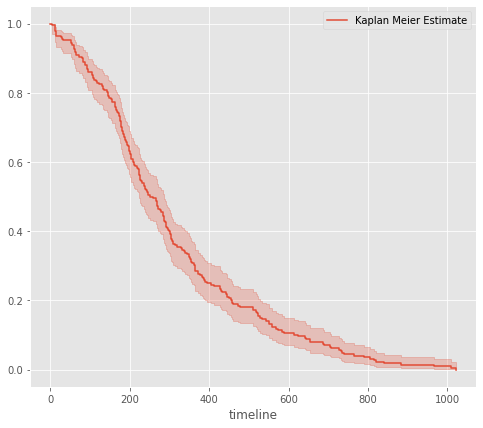

In [216]:
## Create an estimate
kmf.plot(ci_show=True)

#### Comparing survival times between groups¶

In [240]:
groups = df['sex']   

In [241]:
i1 = (groups == '0')      ## males
i2 = (groups == '1')     ## females

In [245]:
i1

0      False
1      False
2      False
3      False
4      False
       ...  
223    False
224    False
225    False
226    False
227    False
Name: sex, Length: 228, dtype: bool

In [246]:
i2

0      False
1      False
2      False
3      False
4      False
       ...  
223    False
224    False
225    False
226    False
227    False
Name: sex, Length: 228, dtype: bool

In [266]:
kmf1 = KaplanMeierFitter()
kmf1.fit(df['time'][df['sex'] == 1], df['status'][df['sex'] == 1], label='Male')
kmf1.survival_function_

,Male
timeline,
0.0,1.000000
11.0,0.978261
12.0,0.971014
13.0,0.956522
15.0,0.949275
...,...
814.0,0.028986
840.0,0.021739
883.0,0.014493


In [268]:
## fit the model for 2nd cohort
kmf2 = KaplanMeierFitter()
kmf2.fit(df['time'][df['sex'] == 2], df['status'][df['sex'] == 2], label='Female')
kmf2.survival_function_

,Female
timeline,
0.0,1.000000
5.0,0.988889
60.0,0.977778
61.0,0.966667
62.0,0.955556
...,...
735.0,0.044444
740.0,0.033333
765.0,0.022222


<AxesSubplot:xlabel='timeline'>

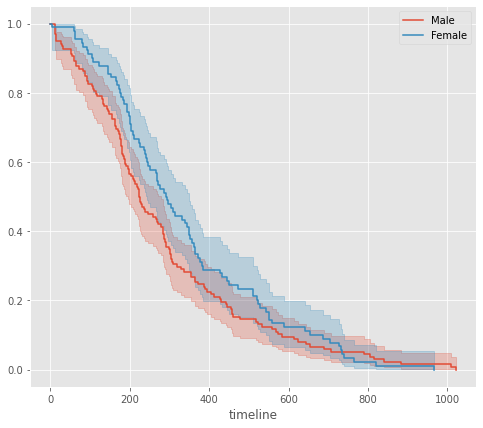

In [269]:
a1 = kmf1.plot()
kmf2.plot(ax=a1)

#### Cox Proportional Hazard - Univariable analysis

In [278]:
cph = CoxPHFitter() 
cph.fit(df[['time','status','sex']], 'time', event_col='status')   
cph.print_summary() 

<lifelines.CoxPHFitter: fitted with 228 total observations, 0 right-censored observations>
             duration col = 'time'
                event col = 'status'
      baseline estimation = breslow
   number of observations = 228
number of events observed = 228
   partial log-likelihood = -1012.46
         time fit was run = 2021-05-25 11:14:45 UTC

---
            coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                         
sex        -0.20       0.82       0.14            -0.47             0.07                 0.63                 1.07

              z    p   -log2(p)
covariate                      
sex       -1.45 0.15       2.77
---
Concordance = 0.55
Partial AIC = 2026.92
log-likelihood ratio test = 2.13 on 1 df
-log2(p) of ll-ratio test = 2.79

#### Cox Proportional Hazard - Multivariable analysis

In [279]:
cph = CoxPHFitter() 
cph.fit(df[['time','status','sex','age']], 'time', event_col='status')   
cph.print_summary() 

<lifelines.CoxPHFitter: fitted with 228 total observations, 0 right-censored observations>
             duration col = 'time'
                event col = 'status'
      baseline estimation = breslow
   number of observations = 228
number of events observed = 228
   partial log-likelihood = -1012.24
         time fit was run = 2021-05-25 11:16:48 UTC

---
            coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                         
sex        -0.19       0.82       0.14            -0.46             0.08                 0.63                 1.08
age         0.01       1.01       0.01            -0.01             0.02                 0.99                 1.02

              z    p   -log2(p)
covariate                      
sex       -1.41 0.16       2.66
age        0.66 0.51       0.97
---
Concordance = 0.56
Partial AIC = 2028.48
log-likelihood ratio test = 2.57 on 2 df
-log2(p) of ll-ratio test = 1.85

In [285]:
cph = CoxPHFitter() 
cph.fit(df[['time','status','sex','age','meal.cal']].dropna(), 'time', event_col='status')   
cph.print_summary() 

<lifelines.CoxPHFitter: fitted with 181 total observations, 0 right-censored observations>
             duration col = 'time'
                event col = 'status'
      baseline estimation = breslow
   number of observations = 181
number of events observed = 181
   partial log-likelihood = -762.01
         time fit was run = 2021-05-25 11:18:32 UTC

---
            coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                         
sex        -0.23       0.79       0.16            -0.54             0.07                 0.58                 1.08
age         0.00       1.00       0.01            -0.02             0.02                 0.98                 1.02
meal.cal   -0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00

              z    p   -log2(p)
covariate                      
sex       -1.49 0.14       2.87
age        0.25 0.81       0.31
meal.cal  -0.77 0.44       1.19
---
Concordance = 0.57
Partial AIC = 1530.01
log-likelihood ratio test = 2.88 on 3 df
-log2(p) of ll-ratio test = 1.29

In [286]:
cph = CoxPHFitter() 
cph.fit(df[['time','status','sex','age','meal.cal','wt.loss']].dropna(), 'time', event_col='status')   
cph.print_summary() 

<lifelines.CoxPHFitter: fitted with 171 total observations, 0 right-censored observations>
             duration col = 'time'
                event col = 'status'
      baseline estimation = breslow
   number of observations = 171
number of events observed = 171
   partial log-likelihood = -710.51
         time fit was run = 2021-05-25 11:19:02 UTC

---
            coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                         
sex        -0.21       0.81       0.16            -0.52             0.11                 0.59                 1.12
age         0.00       1.00       0.01            -0.01             0.02                 0.99                 1.02
meal.cal   -0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
wt.loss    -0.00       1.00       0.01            -0.01             0.01                 0.99                 1.01

              z    p   -log2(p)
covariate                      
sex       -1.28 0.20       2.33
age        0.38 0.70       0.50
meal.cal  -0.70 0.49       1.04
wt.loss   -0.25 0.80       0.32
---
Concordance = 0.56
Partial AIC = 1429.01
log-likelihood ratio test = 2.42 on 4 df
-log2(p) of ll-ratio test = 0.60

In [287]:
cph = CoxPHFitter() 
cph.fit(df.dropna(), 'time', event_col='status')   
cph.print_summary() 

<lifelines.CoxPHFitter: fitted with 167 total observations, 0 right-censored observations>
             duration col = 'time'
                event col = 'status'
      baseline estimation = breslow
   number of observations = 167
number of events observed = 167
   partial log-likelihood = -682.78
         time fit was run = 2021-05-25 11:19:25 UTC

---
            coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                         
inst       -0.01       0.99       0.01            -0.03             0.01                 0.97                 1.01
age         0.00       1.00       0.01            -0.02             0.02                 0.98                 1.02
sex        -0.25       0.78       0.16            -0.57             0.07                 0.56                 1.07
ph.ecog     0.62       1.85       0.20             0.22             1.02                 1.24                 2.76
ph.karno    0.02       1.02       0.01             0.00             0.04                 1.00                 1.04
pat.karno  -0.01       0.99       0.01            -0.02             0.00                 0.98                 1.00
meal.cal   -0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
wt.loss    -0.01       0.99       0.01            -0.02             0.00                 0.98                 1.00

              z      p   -log2(p)
covariate                        
inst      -1.09   0.28       1.86
age        0.01   0.99       0.01
sex       -1.55   0.12       3.04
ph.ecog    3.01 <0.005       8.60
ph.karno   2.30   0.02       5.55
pat.karno -1.35   0.18       2.50
meal.cal  -0.35   0.73       0.46
wt.loss   -1.68   0.09       3.41
---
Concordance = 0.60
Partial AIC = 1381.57
log-likelihood ratio test = 16.80 on 8 df
-log2(p) of ll-ratio test = 4.95